(30, 135, 161)


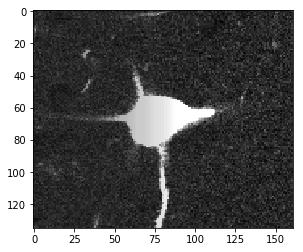

In [2]:
%matplotlib inline
import numpy as np
import os, string
from matplotlib import pyplot as plt
import scipy as sp
import cv2
import tensorflow as tf
import sys,time,tifffile
img = tifffile.imread('30.tif')
#img = cv2.imread('30.jpg')
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)
plt.imshow(img[18,:,:],cmap='gray')

In [3]:
#if sess:
#    sess.close()
dia = 9
with tf.device('/gpu:0'):
    O=tf.placeholder('float', shape=[1,img.shape[1],img.shape[2],1])
    A = tf.placeholder('float', shape=[dia,dia,1,1])
    B=O
    for i in range(20):
        B = tf.nn.conv2d(B,A,strides=[1,1,1,1],padding='SAME')
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

convImg = img.copy().reshape(img.shape[0],img.shape[1],img.shape[2],1)
convImg = np.minimum(convImg*4,400)
blurKernel = np.ones((dia,dia))
blurKernel /= np.sum(blurKernel)
data = np.zeros((1,img.shape[1],img.shape[2],1))
for i in range(30):
    #print(i)
    sys.stdout.write('\r %d'%i)
    time.sleep(0.1)
    data[0,:,:,:] = convImg[i,:,:,:]
    t = sess.run(B,feed_dict={O:data,A:blurKernel.reshape([dia,dia,1,1])})
    print(t[0,:,:,0].shape)
    convImg[i,:,:,0] = t[0,:,:,0].reshape((img.shape[1],img.shape[2]))
    
binImg = img > 1. +8.*np.sqrt(convImg.reshape(img.shape))
sess.close()
#print(convImg.shape)
# dia = 9
# blurKernel = np.ones((dia,dia))
# blurKernel /= np.sum(blurKernel)
# convImg1 = np.minimum(img*4,400)
# for i in range(20):
#     #print(i)
#     sys.stdout.write('\r %d'%i)
#     time.sleep(0.1)
#     convImg1 = cv2.blur(convImg1, (9,9))
    
# binImg1 = img > 1. + 8.*np.sqrt(convImg1.reshape(img.shape))
# resImg1 = binImg1.copy().reshape(img.shape)
# plt.imshow(resImg1,cmap='gray')

 0(135, 161)
 1(135, 161)
 2(135, 161)
 3(135, 161)
 4(135, 161)
 5(135, 161)
 6(135, 161)
 7(135, 161)
 8(135, 161)
 9(135, 161)
 10(135, 161)
 11(135, 161)
 12(135, 161)
 13(135, 161)
 14(135, 161)
 15(135, 161)
 16(135, 161)
 17(135, 161)
 18(135, 161)
 19(135, 161)
 20(135, 161)
 21(135, 161)
 22(135, 161)
 23(135, 161)
 24(135, 161)
 25(135, 161)
 26(135, 161)
 27(135, 161)
 28(135, 161)
 29(135, 161)


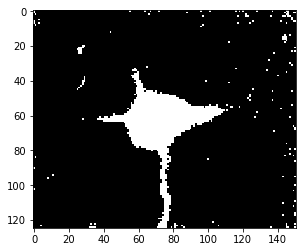

In [4]:
resImg = binImg.copy().reshape(img.shape)
resImg = resImg[:,5:-5,5:-5]
plt.imshow(resImg[18,:,:],cmap='gray')

In [64]:
tpos = np.mat(np.where(np.int8(resImg) == 1))
tpos = tpos.T
print(tpos.shape)
cluster = np.arange(tpos.shape[0])
for i in range(tpos.shape[0]):
    #if i > 1:
    #    break
    #print(tpos[i,:])
    sel0 = np.where(np.abs((tpos[:,0] -tpos[i,0])) < 2)
    #print(sel0[0])
    sel1 = np.where(np.abs((tpos[sel0[0],1] -tpos[i,1])) < 2)
    #print(sel1[0])
    sel2 = np.where(np.abs((tpos[sel0[0][sel1[0]],2] -tpos[i,2])) < 2)
    #print(sel2[0])
    ind = sel0[0][sel1[0][sel2[0]]]
    if ind.shape[0] > 1:
        #print(np.min(np.min(value),cluster[i]))
        fore = cluster[ind]
        fore = np.unique(np.sort(fore))
        a= np.min(fore)
        minValue = min(cluster[i], a)
        fillVal = []
        fillVal.extend(fore)
        fillVal.append(i)
        #print(fillVal)
        for i in fillVal:
            cluster[cluster==i]=minValue
    #print(dist.shape)
    #break


(25317, 3)


In [65]:
sz = []
for i in range(cluster.shape[0]):
    n = np.sum(cluster == i)
    if n > 10:
        sz.append((i,n))
    
print(sz)

[(1, 20543), (5, 394), (68, 13), (211, 30), (216, 73), (247, 13), (262, 378), (279, 12), (451, 11), (577, 17), (1440, 25), (1870, 118), (2850, 18), (2897, 11), (3068, 329), (3465, 15), (3470, 16), (4316, 96), (5232, 23), (5935, 47), (7570, 15), (8821, 14), (8892, 20), (8977, 15), (10275, 13), (11918, 15), (13387, 19), (17950, 12), (18005, 26), (18021, 20), (18036, 31), (19451, 14), (19476, 11), (20624, 13), (20693, 19), (20723, 14), (20810, 19), (21628, 13), (21761, 32), (23081, 15), (24429, 16), (24674, 15), (24769, 11)]


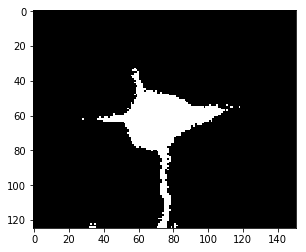

In [66]:
#print(np.where(cluster == 651))
test = np.zeros_like(resImg)
pt = tpos[np.where(cluster == 1)[0],:]
test[pt[:,0],pt[:,1],pt[:,2]] = 255
#test[tpos[:,0],tpos[:,1]]=255
plt.imshow(test[18,:,:],cmap='gray')

In [75]:
print(test.shape)
#tifffile.imsave('hehe.tif',np.int8(test)*255)

(30, 125, 151)


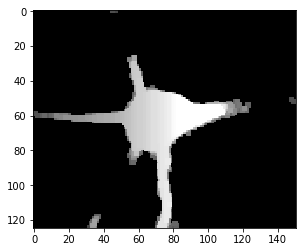

In [86]:
with tf.device('/gpu:0'):
    O=tf.placeholder('float', shape=[None,test.shape[0],test.shape[1],test.shape[2],1])
    M=tf.nn.max_pool3d(O,ksize=(1,3,3,3,1),padding='SAME',strides=(1,1,1,1,1))
    
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

maskImg = np.multiply(img[:,5:-5,5:-5],test)
maxImg = sess.run(M,feed_dict={O:maskImg.reshape([1,test.shape[0],test.shape[1],test.shape[2],1])})
plt.imshow(maxImg[0,18,:,:,0],cmap='gray')

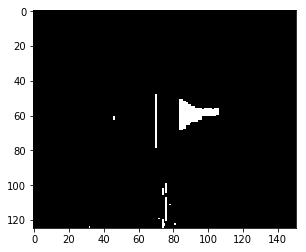

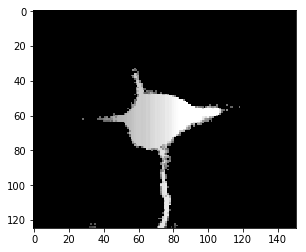

In [96]:
dotImg = np.zeros_like(maskImg)
dotImg[(test >0)& (maskImg==maxImg[0,:,:,:,0])]=255 # 
fig = plt.figure()
#ax = fig.add_subplot(111)
plt.imshow(dotImg[18,:,:],cmap='gray')
fig = plt.figure()
#ax = fig.add_subplot(111)
plt.imshow(maskImg[18,:,:],cmap='gray')

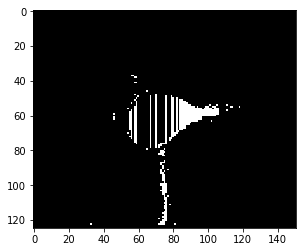

In [97]:
ptImg = np.zeros_like(maskImg)
for ij in range(2,maskImg.shape[0]-2):
    for i in range(2,maskImg.shape[1]-2):
        for j in range(2,maskImg.shape[2]-2):
            if maskImg[ij,i,j] == 0: 
                continue
            if np.max(maskImg[ij-1:ij+1,i-1:i+1,j-1:j+1]) == maskImg[ij,i,j]:
                ptImg[ij,i,j]=255
                
plt.imshow(ptImg[18,:,:],cmap='gray')

In [93]:
help(np.max)

Help on function amax in module numpy.core.fromnumeric:

amax(a, axis=None, out=None, keepdims=<class 'numpy._globals._NoValue'>)
    Return the maximum of an array or maximum along an axis.
    
    Parameters
    ----------
    a : array_like
        Input data.
    axis : None or int or tuple of ints, optional
        Axis or axes along which to operate.  By default, flattened input is
        used.
    
        .. versionadded: 1.7.0
    
        If this is a tuple of ints, the maximum is selected over multiple axes,
        instead of a single axis or all the axes as before.
    out : ndarray, optional
        Alternative output array in which to place the result.  Must
        be of the same shape and buffer length as the expected output.
        See `doc.ufuncs` (Section "Output arguments") for more details.
    
    keepdims : bool, optional
        If this is set to True, the axes which are reduced are left
        in the result as dimensions with size one. With this option,
 